#Assignment - 1

###Due: 11:59 PM CT, September 7

---



MIS 382N: ADVANCED MACHINE LEARNING

Assignment 1

Total points: 70

Due: Wednesday, September 7 submitted via Canvas by 11:59 pm

Your homework should be written in a Python notebook. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas. But be sure to include name and UT EID for both students.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Adoption of AI/ML (5 pts)

Read the HBR article on barriers to adoption of AI/ML based solutions in the healthcare industry, which is posted as the first document in Canvas under Modules --> Resources.

Write a paragraph in your own words summarizing what you feel were the key factors that contributed to the lack of trust (and hence adoption) of the AI/ML solutions discussed.


The hesitancy surrounding the adoption of AI and ML solutions in healthcare is underpinned by several key factors that erode patients' trust in these technologies. Central to these concerns is the perception that AI providers are inflexible and standardized, tailored for the treatment of an "average" patient while failing to account for the unique circumstances and individual idiosyncrasies that often define medical conditions. This belief leads to a preference for human providers, even when AI could potentially offer better results. Interestingly, patients are more willing to pay extra to switch from AI to a human provider than the other way around. The perception of uniqueness plays a significant role in this preference, as patients who see themselves as unique tend to favor human providers. However, when AI is described as capable of tailoring recommendations based on individual characteristics and medical history, patients become more receptive to AI-based care. Demonstrating that AI systems consider the same holistic aspects as human providers can alleviate patient concerns about impersonal and standardized care. To build trust in AI, providers can emphasize the collection of comprehensive patient profiles, including lifestyle, genetics, and environment. Furthermore, AI-based services can incorporate cues that imply personalization, such as statements like "based on your unique profile." These subtle but meaningful indicators can convey the adaptability and customization capabilities of AI systems, helping patients feel more seen and understood. In addition, involving human physicians in the loop by having them confirm the recommendations made by AI providers can act as a reassuring safety net. Patients are more likely to trust AI-based care when they know that their healthcare decisions are being overseen and endorsed by a knowledgeable human healthcare professional. By implementing these strategies, the healthcare industry can pave the way for a more harmonious integration of AI technologies into patient care, ultimately leading to improved healthcare outcomes.



# Question 2: Google Flu Trends (8 pts)

The second article posted  in Canvas under Modules --> Resources, (google flu) describes a high-profile (and embarrassingly  failed)  project done by google, highlighting the phenomena of data drift and the importance of continually monitoring/updating models post deployment.

Read this article and then briefly describe

(i) three important causes of "data drift" in the flu prediction problem that are mentioned in the article, and

(ii) one important aspect of the original google model design that made it very prone to overfitting (and hence poor generalization on future data).


# Question 3: Maximum Likelihood Estimate (12 pts)

100 students in the MSBA Program were asked if they wanted to buy the Big Ticket for the season. They reported their preferences by entering No or Yes in the survey. We use 0 to represent their disinterest in buying the Big Ticket and 1 to represent their interest. A random sample of 30 students yielded the following preferences:

$$0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1$$

These choices are assumed to arise by independent and identically distributed (i.i.d.) sampling from the following distribution and if the unknown parameter $q$ can be estimated, then we can provide more insights about the students' preference.

$$
\begin{equation}
\nonumber P(x) = \left\{
\begin{array}{l l}
    q& \quad \text{for  } x=0\\
1-q & \quad \text{for } x=1
\end{array} \right.
\end{equation}
$$


1. Based on the definitions given above, write down the likelihood function (3 pts)
2. Derive the **maximum likelihood estimator** of $q$ (Algenric expression in terms of variables) (3 pts)
3. Using the given sample, find a maximum likelihood estimate of $q$ as well (numerical value) (3 pts)
4. Show that the maximum likelihood estimate is unbiased (3 pts)

Note: For this question, you can either upload a scanned copy of the handwritten solution or write the answer in LaTex/Markdown.


In [169]:
from IPython import display

display.Image("https://raw.githubusercontent.com/milindbhatiaa/Advance_Machine_Learning/main/Q3-Milind-Bhatia-1.jpg")

# Question 4: Linear Regression (10 pts)

1. What is the difference between R-square and adjusted R square and why is it desirable to use the adjusted value? (4 pts)

2. Overfitting usually happens in complex models. Linear Regression is a fairly simple model. Could overfitting happen in Linear Regression? If so, please explain the scenario in which it could happen and how we can tackle it. (6 pts)


# Question 5: Ridge/ Lasso Regression (35 pts)

This is a programming question. Please read through each subpart of this question carefully. You are required to add lines of code as specified in the code cells. Please carefully read through the comments in the code cells to identify what code is to be written, where it is to be written and how many lines of code are required. Code is to be added between the **## START CODE** ## and **## END CODE ##** comments and in place of the keyword **None**. In certain cases, the number of lines of code that are to be written will be specified. For example, **## START CODE ## (1 line of code)** specifies that only 1 line of code is to be added between the ## START CODE ## and ## END CODE ## comments. In case there is no information on the required number of lines, you are allowed to add any number of lines of code.

The following question covers the California housing prices dataset and linear models in python. The dataset is taken from https://www.kaggle.com/camnugent/california-housing-prices/version/1. The categorical variables and rows with missing variables are removed to make it easier to run the models.

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The columns are as follows:

* longitude
* latitude
* housingmedianage
* total_rooms
* total_bedrooms
* population
* households
* median_income
* medianhousevalue
* ocean_proximity (this feature has been removed from the csv file since it is an ordinal variable)

NOTE
* Only use the following code block if you are using Google Colab. If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
* It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housing_data.csv to housing_data.csv


Imports required

In [47]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

%matplotlib inline
pd.options.mode.chained_assignment = None

df = pd.read_csv("housing_data.csv")
X = df.drop(['median_house_value'],axis=1)
Y = df['median_house_value']



In [48]:
# Show you all the columns in this file
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [49]:
# Show you the first 5 rows in this file
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


## Part-1: *(2 pts)*

Split the data into a training set (75% of data) and a test set (25% of data), using the train_test_split function with random_state = 50.

In [50]:
##  START CODE  ## (1 line of code)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state=50)
##  END CODE    ##

Scale the data (not including target) so that each of the independent variables would have zero mean and unit variance. You can use the sklearn.preprocessing.scale function for this.

In [51]:
##  START CODE  ## (2 lines of code)
Xscaled_train = scale(X_train)
Xscaled_test = scale(X_test)
##  END CODE    ##

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

Print the first 5 rows of the training set after scaling

In [52]:
##  START CODE  ##
print(Xscaled_train[:5,])
##  END CODE    ##

[[-1.13113681  1.91091856  1.85290292 -0.97858972 -1.04294314 -0.99407214
  -1.05120862 -1.2222887 ]
 [-1.12615029  0.76639279 -0.92620274  0.19946448  0.16877038  0.54845443
   0.27854331  0.71761009]
 [ 0.70888992 -0.7004688   1.85290292 -1.02423644 -1.0022334  -0.94920516
  -1.03796408 -1.18162406]
 [-1.21590769  0.62157525  1.13827575 -0.2132003  -0.06351462 -0.18915862
  -0.08700602 -0.69687411]
 [ 0.86347211 -0.70981187 -0.29097859  0.38758429  0.07298275  0.27207387
   0.10371537  0.51338795]]


Select any two variables. See how their histograms and scatterplots compare before and after scaling.

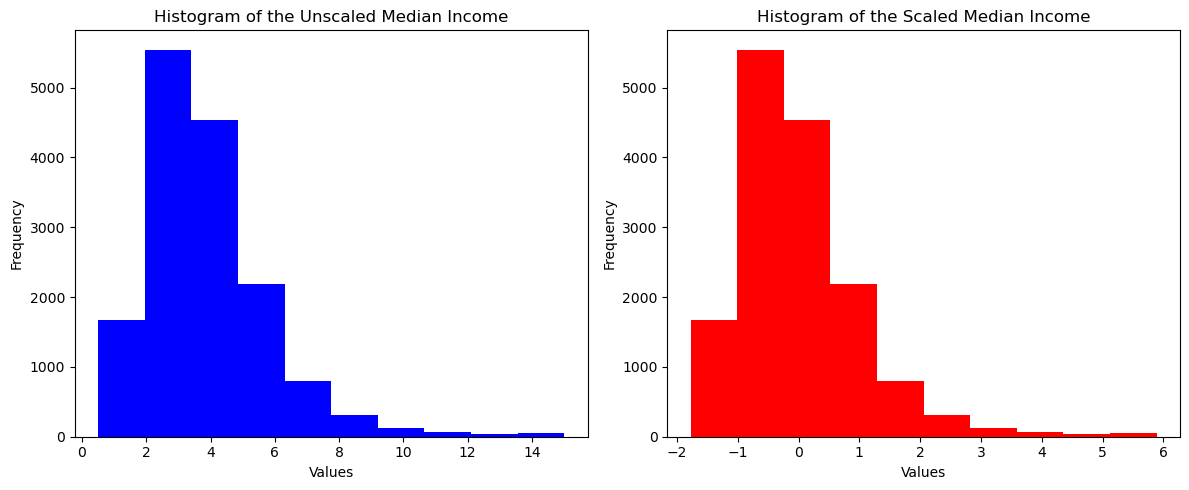

In [53]:
##  START CODE  ##
dataUS = X_train['median_income']
dataS = Xscaled_train[:,7]

# Create subplots for two separate histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the histogram for the 8th column of the first dataset
ax1.hist(dataUS, color='blue')
ax1.set_xlabel('Values')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of the Unscaled Median Income')

# Plot the histogram for the 8th column of the second dataset
ax2.hist(dataS, color='red')
ax2.set_xlabel('Values')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of the Scaled Median Income')

plt.tight_layout()
plt.show()
##  END CODE    ##

> Both distributions appear visually similar but have distinct characteristics:

>- The histogram of the original data is centered around the original mean, reflecting the initial data distribution.
>- In contrast, the scaled data histogram is centered precisely at 0 and has a standard deviation of 1 due to scaling.

>*This visual similarity arises because scaling preserves the relative ordering of data points while shifting and scaling them. Peaks and patterns in the original data remain present in the scaled data, now centered around 0. However, the centering and scaling are fundamentally different.*


## Part-2: *(5 pts)*

Use `sklearn.linear_model.Lasso` and `sklearn.linear_model.Ridge` classes to do a 5-fold cross validation using sklearn's `KFold`. For the sweep of the regularization parameter, we will look at a grid of values ranging from  $\alpha=10^{-6}$  to  $\alpha=10^{6}$.In Python, you can consider this range of values as follows: `alpha = 10**numpy.linspace(-6, 6, 100)` so that you can generate 100 uniform values between -6 to 6 as power series.

Fit the 2 regression models (Lasso and Ridge) with scaled data and report the best chosen $\alpha$ based on cross validation as well as the corresponding scoring metric. The cross validation should happen on your training data using MSE as the scoring metric.

In [141]:
# Define number of folds
##  START CODE  ## (1 line of code)
n_folds = 5
##  END CODE  ##


In [142]:
# Create KFold from sklearn
##  START CODE  ## (1 line of code)
k_fold = KFold(n_splits=n_folds, shuffle=True, random_state=50)
##  END CODE    ##


In [143]:
#Define the alphas as defined in the question
##  START CODE  ## (1 line of code)
alphas = 10**np.linspace(6,-6,100)
##  END CODE    ##

lasso_avg_mse = {}
ridge_avg_mse = {}

In [145]:
#For each value of alpha and each fold compute the mean square error
for alpha in alphas:

  #Instantiate a lasso model with the current alpha
  ##  START CODE  ## (1 line of code)
  lasso = linear_model.Lasso(alpha=alpha)
  ##  END CODE    ##

  avg_mse = 0

  for k, (train, test) in enumerate(k_fold.split(X_train, y_train)):

    #Fit the scaled training data to the lasso model
    ## START CODE ## (1 line of code)
    lasso.fit(Xscaled_train[train],y_train[train])
    ## END CODE ##
    
    #Calculate the average mean sqaured error
    ##  START CODE  ## (1 line of code)
    avg_mse = avg_mse + ((y_train[test]-lasso.predict(Xscaled_train[test]))**2).mean()
    ##  END CODE    ##

  # Take the average mean squared error as metric
  lasso_avg_mse[alpha] = avg_mse / n_folds

In [146]:
# Find the best value for alpha with minimum mean squared error
##  START CODE  ## (1 line of code)
best_alpha_lasso = min(lasso_avg_mse, key=lambda k: lasso_avg_mse[k])
##  END CODE    ##

print("Best lasso alpha: {}".format(best_alpha_lasso))

Best lasso alpha: 57.2236765935022


In [147]:
#For each value of alpha and each fold compute the mean square error
for alpha in alphas:

  #Instantiate a ridge model with the current alpha
  ##  START CODE  ## (1 line of code)
  ridge = linear_model.Ridge(alpha=alpha)
  ##  END CODE    ##

  avg_mse = 0

  for k, (train, test) in enumerate(k_fold.split(X_train, y_train)):

    #Fit the scaled training data to the ridge model
    ## START CODE ## (1 line of code)
    ridge.fit(Xscaled_train[train],y_train[train])
    ## END CODE ##

    #Calculate the average mean sqaured error
    ##  START CODE  ## (1 line of code)
    avg_mse = avg_mse + ((y_train[test]-ridge.predict(Xscaled_train[test]))**2).mean()
    ##  END CODE    ##

  # Take the average mean squared error as metric
  ridge_avg_mse[alpha] = avg_mse / n_folds

In [149]:
# Find the best value for alpha with minimum mean squared error
##  START CODE  ## (1 line of code)
best_alpha_ridge = min(ridge_avg_mse, key=lambda k: ridge_avg_mse[k])
##  END CODE    ##

print("Best Ridge alpha: {}".format(best_alpha_ridge))

Best Ridge alpha: 14.174741629268048


## Part-3: *(7 pts)*

Run ridge and lasso regression for all of the $\alpha$ specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; different features' weights of each model should be on the same plot with different colors.

In [150]:
# Lasso Regression

alphas = 10**np.linspace(6,-6,100)

lasso = linear_model.Lasso(alpha=alpha)
coefs = []

for a in alphas:
  #Specify current alpha as parameter for the lasso model
  ## START CODE ## (1 line of code)
  lasso.alpha = a
  ## END CODE ##

  #Fit the training data to the lasso model
  ## START CODE ## (1 line of code)
  lasso.fit(Xscaled_train,y_train)
  ## END CODE ##

  #Store learned coefficients in the coef variable
  ## START CODE ## (1 line of code)
  
  coefs.append(lasso.coef_)
  ## END CODE ##

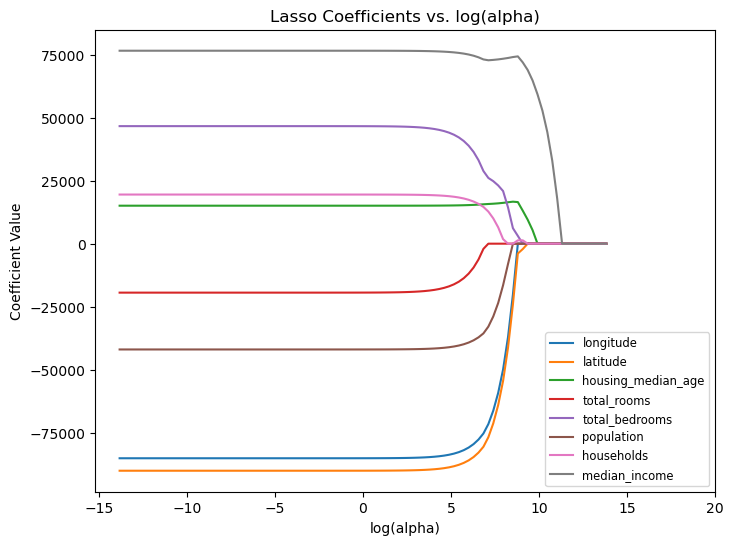

In [153]:
# Write the code to make the plot for coefficients learned from lasso
## START CODE ##
coefs = np.array(coefs)

feature_names = X_train.columns

plt.figure(figsize=(8, 6)) 

for i in range(coefs.shape[1]):
    plt.plot(np.log(alphas), coefs[:, i], label=feature_names[i])

plt.xlabel('log(alpha)')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients vs. log(alpha)')
plt.legend(loc='lower right', fontsize='small')
plt.xticks(np.arange(-15, 25, 5)) 
plt.show()
## END CODE ##

In [155]:
# Ridge Regression

alphas = 10**np.linspace(6,-6,100)

ridge = linear_model.Ridge(alpha=alpha)
coefs = []

for a in alphas:
  #Specify current alpha as parameter for the ridge model
  ## START CODE ## (1 line of code)
  ridge.alpha = a
  ## END CODE ##

  #Fit the training data to the ridge model
  ## START CODE ## (1 line of code)
  ridge.fit(Xscaled_train,y_train)
  ## END CODE ##

  #Store learned coefficients in the coef variable
  ## START CODE ## (1 line of code)
  coefs.append(ridge.coef_)
  ## END CODE ##

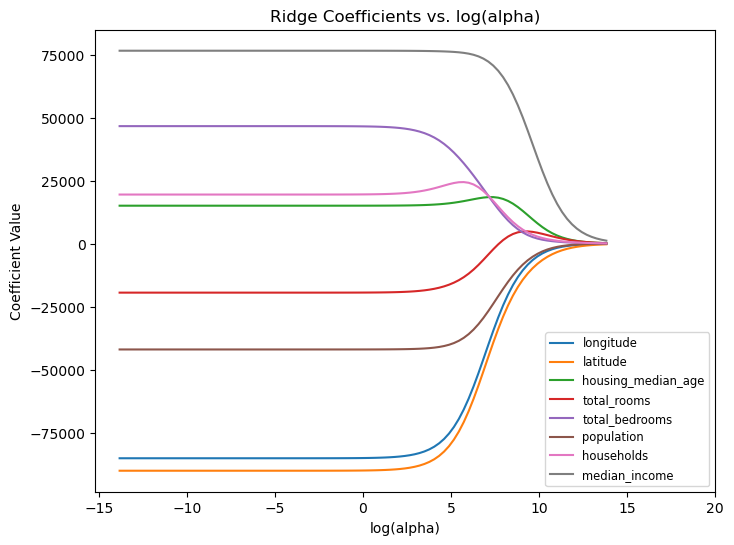

In [157]:
# Write the code to make the plot for coefficients learned from ridge
## START CODE ##
coefs = np.array(coefs)

feature_names = X_train.columns

plt.figure(figsize=(8, 6)) 

for i in range(coefs.shape[1]):
    plt.plot(np.log(alphas), coefs[:, i], label=feature_names[i])

plt.xlabel('log(alpha)')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficients vs. log(alpha)')
plt.legend(loc='lower right', fontsize='small')
plt.xticks(np.arange(-15, 25, 5)) 
plt.show()
## END CODE ##

What do you qualitatively observe when the value of the regularization parameter changes?

> *Comparing both graphs, we observe differences due to the penalty applied in these models. In Lasso Regression, increasing the regularization parameter leads to coefficients being set to zero, while in Ridge Regression, coefficients approach zero. In both cases, this regularization process minimizes the cost function by driving coefficients toward zero or very small values.*

## Part-4: *(5 pts)*

Similarly, use `sklearn.linear_model.ElasticNet` to do linear regression with different $\alpha$ values, and plot the coefficients learned for each of them

In [158]:
# ElasticNet Regression

alphas = 10**np.linspace(6,-6,100)

ElastNet = linear_model.ElasticNet(alpha=alpha)
coefs = []

for a in alphas:
  #Specify current alpha as parameter for the ElasticNet model
  ## START CODE ## (1 line of code)
  ElastNet.alpha = a
  ## END CODE ##

  #Fit the training data to the ElasticNet model
  ## START CODE ## (1 line of code)
  ElastNet.fit(Xscaled_train,y_train)
  ## END CODE ##

  #Store learned coefficients in the coef variable
  ## START CODE ## (1 line of code)
  coefs.append(ElastNet.coef_)
  ## END CODE ##

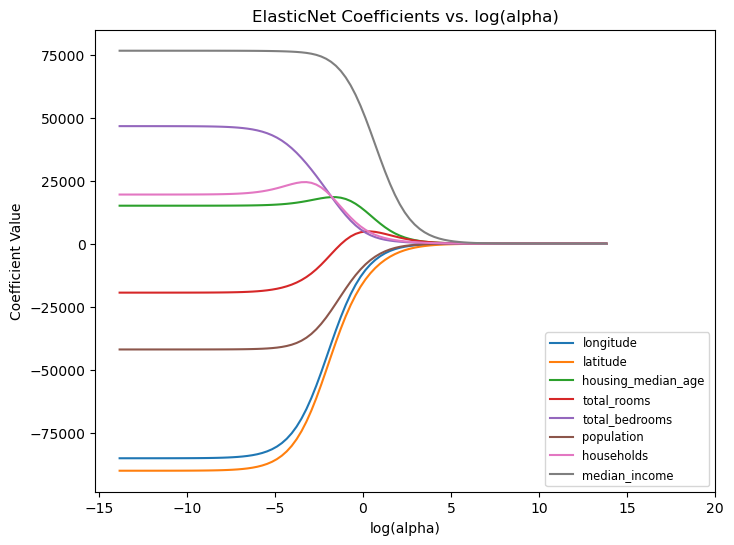

In [159]:
# Write the code to make the plot for coefficients learned from ElasticNet
## START CODE ##
coefs = np.array(coefs)

feature_names = X_train.columns

plt.figure(figsize=(8, 6)) 

for i in range(coefs.shape[1]):
    plt.plot(np.log(alphas), coefs[:, i], label=feature_names[i])

plt.xlabel('log(alpha)')
plt.ylabel('Coefficient Value')
plt.title('ElasticNet Coefficients vs. log(alpha)')
plt.legend(loc='lower right', fontsize='small')
plt.xticks(np.arange(-15, 25, 5)) 
plt.show()
## END CODE ##

Observe the plot, then explain the pros and cons of ridge, lasso and Elastic Net models.

**Ridge Regression:**
- Addresses multicollinearity by shrinking correlated coefficients towards each other.
- Stabilizes coefficients, preventing them from becoming too large or too small.
- Does not perform feature selection but keeps all features in the model.

**Lasso Regression:**
- Automatically performs feature selection by driving some coefficients to exactly zero.
- Simplifies models by eliminating less important features.
- Can be overly aggressive in feature selection, potentially removing relevant features.

**Elastic Net Regression:**
- Combines Ridge and Lasso by adding both L1 (Lasso) and L2 (Ridge) penalties to the cost function.
- Balances feature selection and coefficient stabilization.
- Effective at handling multicollinearity.
- Requires tuning an additional hyperparameter compared to Ridge and Lasso.


## Part-5: *(10 pts)*

Run the following three regression models with MSE loss on the training data:

a. linear regression without regularization

b. linear regression with ridge regularization

c. linear regression with lasso regularization


For part (b) and (c), use only the best regularization parameters. Report the MSE and R2 on the test data for each of the models.

In [161]:
## START CODE ##
models = {}
models['LinearRegression'] = \
    linear_model.LinearRegression()

models['Lasso'] = \
    lasso = linear_model.Lasso(alpha=best_alpha_lasso)

models['Ridge'] = \
    lasso = linear_model.Ridge(alpha=best_alpha_ridge)

for name, model in models.items():
    print('Fitting', name)
    model.fit(Xscaled_train, y_train)

mse_train = {}
mse_test = {}
r2_test = {}
for name, model in models.items():
    prediction_train = model.predict(Xscaled_train)
    mse_train[name] = mean_squared_error(y_train, prediction_train)
    prediction_test = model.predict(Xscaled_test)
    mse_test[name] = mean_squared_error(y_test, prediction_test)
    r2_test[name] = r2_score(y_test, prediction_test)
    
df = pd.DataFrame({'Training MSE':mse_train, 'Test MSE':mse_test, 'Test R2 Score':r2_test})
df
## END CODE ##

Fitting LinearRegression
Fitting Lasso
Fitting Ridge


,Training MSE,Test MSE,Test R2 Score
LinearRegression,4.831535e+09,4.876717e+09,0.637302
Lasso,4.831778e+09,4.877492e+09,0.637244
Ridge,4.831779e+09,4.878261e+09,0.637187


## Part-6: *(3 pts)*

Train the 3 models and report metrics with the original data without scaling

In [164]:
##  START CODE  ##
models = {}
models['LinearRegression'] = \
    linear_model.LinearRegression()

models['Lasso'] = \
    lasso = linear_model.Lasso(alpha=best_alpha_lasso)

models['Ridge'] = \
    lasso = linear_model.Ridge(alpha=best_alpha_ridge)

for name, model in models.items():
    print('Fitting', name)
    model.fit(X_train, y_train)

mse_train = {}
mse_test = {}
r2_test = {}
for name, model in models.items():
    prediction_train = model.predict(X_train)
    mse_train[name] = mean_squared_error(y_train, prediction_train)
    prediction_test = model.predict(X_test)
    mse_test[name] = mean_squared_error(y_test, prediction_test)
    r2_test[name] = r2_score(y_test, prediction_test)
    
df = pd.DataFrame({'Training MSE':mse_train, 'Test MSE':mse_test, 'Test R2 Score':r2_test})
df
##  END CODE    ##

Fitting LinearRegression
Fitting Lasso
Fitting Ridge


,Training MSE,Test MSE,Test R2 Score
LinearRegression,4.831535e+09,4.861014e+09,0.638470
Lasso,4.831557e+09,4.861296e+09,0.638449
Ridge,4.831545e+09,4.861215e+09,0.638455


## Part-7: *(3 pts)*

Why is it advisable to scale the independent variables when applying ridge or  lasso regression?